<font size="5">

# Multi-Grid measurements at LET 2022 - preparations

<font size="3">

> __Author:__ A. Backis
<br/>__Institute:__ University of Glasgow (UoG), European Spallation Source (ESS)
<br/>__Date:__ 6/10-2021

_Abstract:_
This notebook contains the data analysis used for the preparations leading up to the LET measurements with the Multi-Grid detector.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Parameters](#PARAMETERS)
* [2. Validation](#VALIDATION)
    * [2.1 Parsing](#PARSING)
* [3. Data](#DATA)
    * [3.1 Paths](#PATHS)  

# 1. Introduction<a class="anchor" id="INTRODUCTION"></a>

Notebook showing the preparations leading up to the LET measurements.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

Import necessary packages.

In [1]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# Activate matplotlib in interactive notebook mode
%matplotlib widget

# Ensure custom packages can be reached
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# General packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom packages
import file_handling.mg_vmm_read as mg_read

## 1.2 Parameters<a class="anchor" id="PARAMETERS"></a>

Define global parameters.

In [2]:
# Constants
MODERATOR_TO_SAMPLE_IN_M = 25
CSPEC_TYPE = 64
TIME_RESOLUTION = 11.36e-9 # seconds

# Paths to folders containing data
nb_path = os.getcwd()
TEST_FOLDER = nb_path + '/../data/test/'

Prepare JSON file defining detector configuration.

In [4]:
configuration_dict = {'detector': 'MG_LET',
                      'columns': 2,
                      'grids_per_column': 51,
                      'rows_per_grid': 6,
                      'layers_per_grid': 16,
                      'voxel_pitch_x_in_mm': 22.5, 
                      'voxel_pitch_y_in_mm': 22.5, # This should be a bit more due to spacing between adjacent grids
                      'voxel_pitch_z_in_mm': 10,
                      'wire_asic': 0,
                      'grid_asic': 1,
                      'column_to_electronic': {0: {'Ring': 0, 'FEN': 1, 'Hybrid': 0},
                                               1: {'Ring': 0, 'FEN': 1, 'Hybrid': 1}}
                      }

# 2. Validation<a class="anchor" id="VALIDATION"></a>

Here we are going to validate that the code is working as expected. Starting with the data parser and progressively moving towards the more advanced features.

## 2.1. Parsing<a class="anchor" id="PARSING"></a>

In [7]:
# Parse test data
df_freia_test = mg_read.read_vmm_data(TEST_FOLDER + 'freiatest.pcapng')
df_let_test = mg_read.read_vmm_data(TEST_FOLDER + 'cspec_for_alex.pcapng')

# Declare visualization plot function
def plot_vmm_data(df, title):
    columns = list(df)
    xy_plot_ids = np.array([4, 5, 6, 7, 8, 9, 13, 14, 17, 18]) - 1
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(60)
    fig.suptitle(title, y=1.005)
    for i, column in enumerate(columns):
        plt.subplot(12, 2, i+1)
        df_temp = df[column].to_numpy()
        if i in xy_plot_ids:
            plt.plot(df_temp, color='black')
            plt.xlabel('Readout number')
            plt.ylabel(column)
        elif column == 'ring':
            plt.hist(df_temp, color='black', histtype='step', range=[-0.5, 23.5], bins=24)
            plt.xlabel(column)
            plt.ylabel('Counts')
        elif column == 'channel':
            plt.hist(df_temp, color='black', histtype='step', range=[-0.5, 63.5], bins=64)
            plt.xlabel(column)
            plt.ylabel('Counts')
        else:
            plt.hist(df_temp, color='black', histtype='step')
            plt.xlabel(column)
            plt.ylabel('Counts')
        plt.title(column)
        plt.grid(True, which='major', linestyle='--', zorder=0)
        plt.grid(True, which='minor', linestyle='--', zorder=0)
        fig.savefig('test.png')
    plt.tight_layout()
    
def plot_time_stamp(df, time_resolution, title):
    fig = plt.figure()
    time_stamps = df['time_hi'].to_numpy() + df['time_lo'].to_numpy() * time_resolution
    plt.plot(time_stamps, color='black')
    plt.grid(True, which='major', linestyle='--', zorder=0)
    plt.grid(True, which='minor', linestyle='--', zorder=0)
    plt.xlabel('Readout number')
    plt.ylabel('Time (s)')
    plt.show()
    
#plot_time_stamp(df_test_1, TIME_RESOLUTION, 'freiatest')
#plot_vmm_data(df_test_1, 'freiatest')

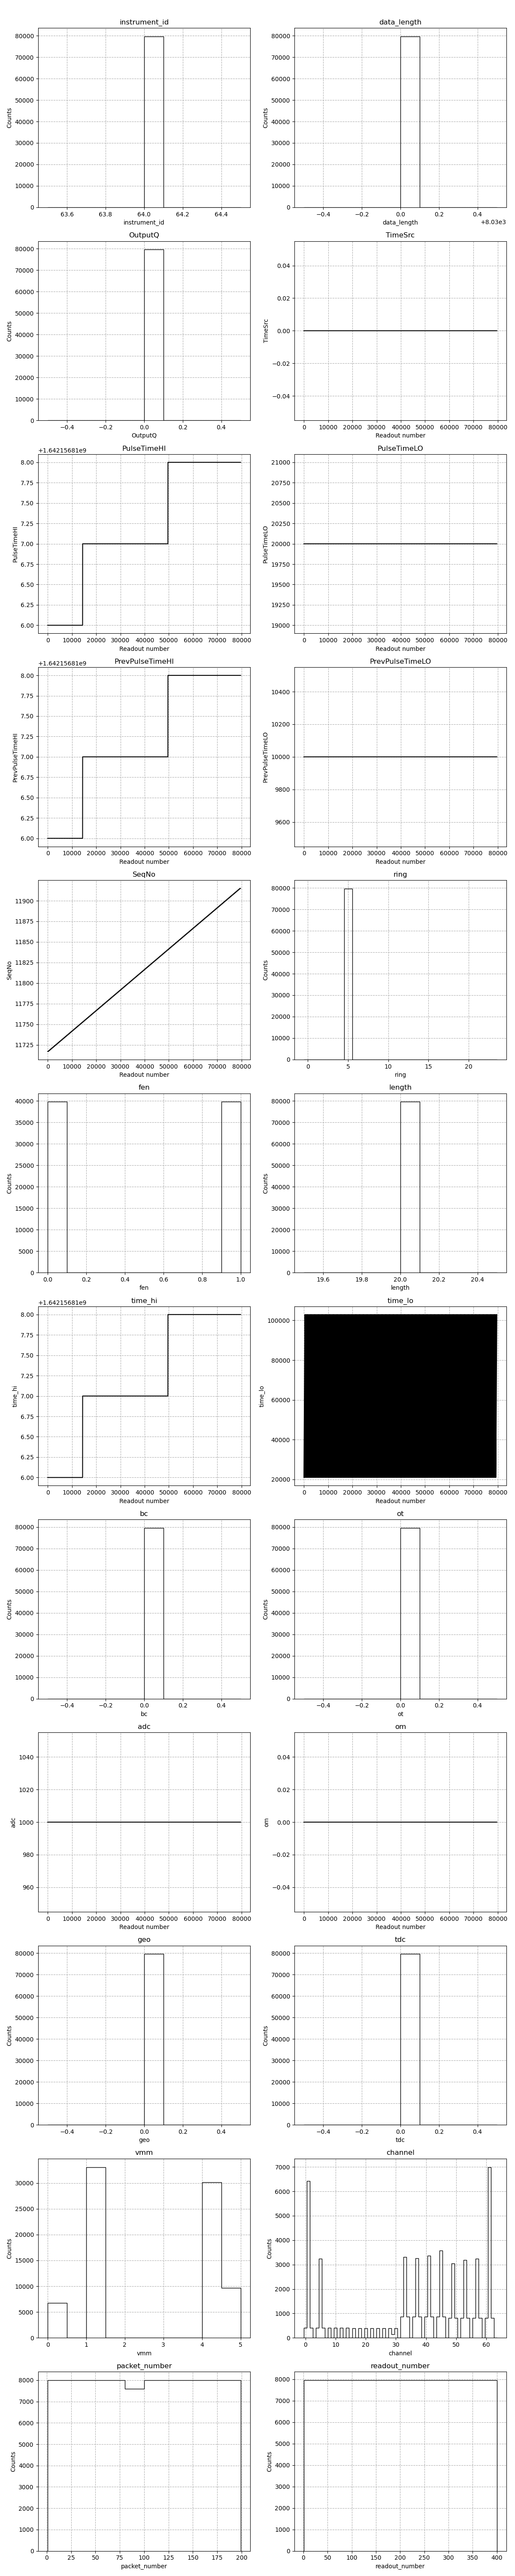

In [8]:
# Test some data sets
plot_vmm_data(df_let_test, 'LET test data 1')
#df_freia_test[(df_freia_test.packet_number == 1) && (df_freia_test.packet_number == 1)]